# PCA for 6 and 10 components

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [174]:
df_15_10inst = pd.read_csv('C:/PSL_KNN/data_15_frames_10_instances.csv')

df_15_10inst['classes'] = df_15_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_15_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_15_10inst['videoname']))
temp_15_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())

['aprender_175' 'aprender_18' 'aprender_195' 'aprender_217' 'aprender_27'
 'aprender_282' 'aprender_34' 'aprender_35' 'aprender_7' 'aprender__466'
 'bien_16' 'bien_241' 'bien_244' 'bien_278' 'bien_295' 'bien_329'
 'bien_39' 'bien_401' 'bien_561' 'bien_95' 'comer_144' 'comer_248'
 'comer_286' 'comer_303' 'comer_323' 'comer_335' 'comer_560' 'comer_625'
 'comer_712' 'comer_765' 'emoción_143' 'emoción_249' 'emoción_250'
 'emoción_272' 'emoción_281' 'emoción_286' 'emoción_43' 'emoción_54'
 'emoción_71' 'emoción_93' 'sentir_14' 'sentir_149' 'sentir_16'
 'sentir_187' 'sentir_38' 'sentir_458' 'sentir_591' 'sentir_602'
 'sentir_604' 'sentir_89' 'sí_157' 'sí_159' 'sí_194' 'sí_240' 'sí_253'
 'sí_281' 'sí_633' 'sí_76' 'sí_79' 'sí_83']


In [175]:
temp_15_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'bien_16','bien_241','bien_244','bien_278','bien_295','bien_329'
,'bien_39','bien_401','bien_561','bien_95','comer_144','comer_248'
,'comer_286','comer_303','comer_323','comer_335','comer_560','comer_625'
,'comer_712','comer_765','emoción_143','emoción_249','emoción_250'
,'emoción_272','emoción_281','emoción_286','emoción_43','emoción_54'
,'emoción_71','emoción_93','sentir_14','sentir_149','sentir_16'
,'sentir_187','sentir_38','sentir_458','sentir_591','sentir_602'
,'sentir_604','sentir_89','sí_157','sí_159','sí_194','sí_240','sí_253'
,'sí_281','sí_633','sí_76','sí_79','sí_83'],True)


temp_15_10inst['classes'] = temp_15_10inst['instance'].apply(lambda x: x.split('_')[0])


In [176]:
temp_15_10inst

temp_15_10inst.instance.unique()

alldataset_dataset_15_10inst = temp_15_10inst.iloc[:,1:692]  #461 columnas
new_alldataset_dataset_15_10inst = temp_15_10inst.iloc[:,1:691]  #460 columnas
new_alldataset_dataset_15_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,680,681,682,683,684,685,686,687,688,689
0,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,0.529510,...,0.500838,0.711247,0.265011,0.616345,0.206288,0.619600,0.193010,0.575766,0.216091,0.569957
1,0.514355,0.548313,0.566283,0.582197,0.492174,0.473143,0.458056,0.605790,0.432162,0.548547,...,0.835927,0.593772,0.717398,0.273364,0.725694,0.203702,0.691389,0.187576,0.682246,0.215089
2,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,0.531288,...,0.545798,0.660586,0.365322,0.592418,0.316429,0.612745,0.295847,0.586953,0.318972,0.577937
3,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,0.565821,...,0.688550,0.651008,0.534688,0.491965,0.493898,0.453951,0.451767,0.424164,0.463112,0.435933
4,0.503365,0.525808,0.540525,0.552654,0.479290,0.461092,0.443024,0.578166,0.415693,0.533283,...,0.837421,0.595184,0.661107,0.276439,0.618137,0.213217,0.572178,0.194524,0.589513,0.223879


In [177]:
alldataset_dataset_15_10inst = alldataset_dataset_15_10inst.T.iloc[:690,:]
alldataset_dataset_15_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.495806,0.514355,0.497058,0.534864,0.503365,0.509485,0.507398,0.469856,0.516629,0.496019,...,0.46611,0.495871,0.464511,0.48744,0.486417,0.483959,0.518324,0.451019,0.429841,0.472396
1,0.523832,0.548313,0.520504,0.561178,0.525808,0.528646,0.533684,0.49226,0.533556,0.525887,...,0.489855,0.508207,0.488182,0.499976,0.507962,0.513006,0.542767,0.472362,0.456041,0.498804
2,0.543781,0.566283,0.534275,0.575552,0.540525,0.544299,0.546516,0.508573,0.54548,0.539174,...,0.506649,0.518065,0.50546,0.512525,0.523446,0.529395,0.561748,0.488464,0.472933,0.516522
3,0.561008,0.582197,0.545982,0.589922,0.552654,0.560631,0.563036,0.525647,0.558149,0.555429,...,0.520988,0.52895,0.521699,0.525392,0.537221,0.544295,0.576794,0.503826,0.490137,0.529614
4,0.480482,0.492174,0.475575,0.518197,0.47929,0.484755,0.481147,0.448011,0.498532,0.469796,...,0.445842,0.468887,0.441407,0.461176,0.462227,0.456726,0.490111,0.429651,0.416417,0.451923


In [178]:
temp_15_10inst.instance.unique()

array(['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'bien_16', 'bien_241', 'bien_244',
       'bien_278', 'bien_295', 'bien_329', 'bien_39', 'bien_401',
       'bien_561', 'bien_95', 'comer_144', 'comer_248', 'comer_286',
       'comer_303', 'comer_323', 'comer_335', 'comer_560', 'comer_625',
       'comer_712', 'comer_765', 'emoción_143', 'emoción_249',
       'emoción_250', 'emoción_272', 'emoción_281', 'emoción_286',
       'emoción_43', 'emoción_54', 'emoción_71', 'emoción_93',
       'sentir_14', 'sentir_149', 'sentir_16', 'sentir_187', 'sentir_38',
       'sentir_458', 'sentir_591', 'sentir_602', 'sentir_604',
       'sentir_89', 'sí_157', 'sí_159', 'sí_194', 'sí_240', 'sí_253',
       'sí_281', 'sí_633', 'sí_76', 'sí_79', 'sí_83'], dtype=object)

In [179]:
alldataset_dataset_15_10inst.columns = ['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'bien_16', 'bien_241', 'bien_244',
       'bien_278', 'bien_295', 'bien_329', 'bien_39', 'bien_401',
       'bien_561', 'bien_95', 'comer_144', 'comer_248', 'comer_286',
       'comer_303', 'comer_323', 'comer_335', 'comer_560', 'comer_625',
       'comer_712', 'comer_765', 'emoción_143', 'emoción_249',
       'emoción_250', 'emoción_272', 'emoción_281', 'emoción_286',
       'emoción_43', 'emoción_54', 'emoción_71', 'emoción_93',
       'sentir_14', 'sentir_149', 'sentir_16', 'sentir_187', 'sentir_38',
       'sentir_458', 'sentir_591', 'sentir_602', 'sentir_604',
       'sentir_89', 'sí_157', 'sí_159', 'sí_194', 'sí_240', 'sí_253',
       'sí_281', 'sí_633', 'sí_76', 'sí_79', 'sí_83']

In [180]:
alldataset_dataset_15_10inst_features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459', 'feature_460','feature_461','feature_462','feature_463','feature_464','feature_465','feature_466','feature_467','feature_468','feature_469','feature_470','feature_471','feature_472','feature_473','feature_474','feature_475','feature_476','feature_477','feature_478','feature_479','feature_480','feature_481','feature_482','feature_483','feature_484','feature_485','feature_486','feature_487','feature_488','feature_489','feature_490','feature_491','feature_492','feature_493','feature_494','feature_495','feature_496','feature_497','feature_498','feature_499', 'feature_500','feature_501','feature_502','feature_503','feature_504','feature_505','feature_506','feature_507','feature_508','feature_509','feature_510','feature_511','feature_512','feature_513','feature_514','feature_515','feature_516','feature_517','feature_518','feature_519','feature_520','feature_521','feature_522','feature_523','feature_524','feature_525','feature_526','feature_527','feature_528','feature_529','feature_530','feature_531','feature_532','feature_533','feature_534','feature_535','feature_536','feature_537','feature_538','feature_539','feature_540','feature_541','feature_542','feature_543','feature_544','feature_545','feature_546','feature_547','feature_548','feature_549','feature_550','feature_551','feature_552','feature_553','feature_554','feature_555','feature_556','feature_557','feature_558','feature_559','feature_560','feature_561','feature_562','feature_563','feature_564','feature_565','feature_566','feature_567','feature_568','feature_569','feature_570','feature_571','feature_572','feature_573','feature_574','feature_575','feature_576','feature_577','feature_578','feature_579','feature_580','feature_581','feature_582','feature_583','feature_584','feature_585','feature_586','feature_587','feature_588','feature_589','feature_590','feature_591','feature_592','feature_593','feature_594','feature_595','feature_596','feature_597','feature_598','feature_599','feature_600','feature_601','feature_602','feature_603','feature_604','feature_605','feature_606','feature_607','feature_608','feature_609','feature_610','feature_611','feature_612','feature_613','feature_614','feature_615','feature_616','feature_617','feature_618','feature_619','feature_620','feature_621','feature_622','feature_623','feature_624','feature_625','feature_626','feature_627','feature_628','feature_629','feature_630','feature_631','feature_632','feature_633','feature_634','feature_635','feature_636','feature_637','feature_638','feature_639','feature_640','feature_641','feature_642','feature_643','feature_644','feature_645','feature_646','feature_647','feature_648','feature_649','feature_650','feature_651','feature_652','feature_653','feature_654','feature_655','feature_656','feature_657','feature_658','feature_659','feature_660','feature_661','feature_662','feature_663','feature_664','feature_665','feature_666','feature_667','feature_668','feature_669','feature_670','feature_671','feature_672','feature_673','feature_674','feature_675','feature_676','feature_677','feature_678','feature_679','feature_680','feature_681','feature_682','feature_683','feature_684','feature_685','feature_686','feature_687','feature_688','feature_689']

In [181]:
alldataset_dataset_15_10inst['features'] = alldataset_dataset_15_10inst_features

alldataset_dataset_15_10inst.set_index('features',inplace = True)

In [182]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_alldataset = preprocessing.scale(alldataset_dataset_15_10inst.T)

In [183]:
pca_alldataset = PCA()
pca_alldataset.fit(scaled_data_alldataset)
pca_data_alldataset = pca_alldataset.transform(scaled_data_alldataset)

In [184]:
per_var_alldataset = np.round(pca_alldataset.explained_variance_ratio_* 100 , decimals = 1)
labels_alldataset = ['PC' + str(x) for x in range(1 , len(per_var_alldataset) +1)]

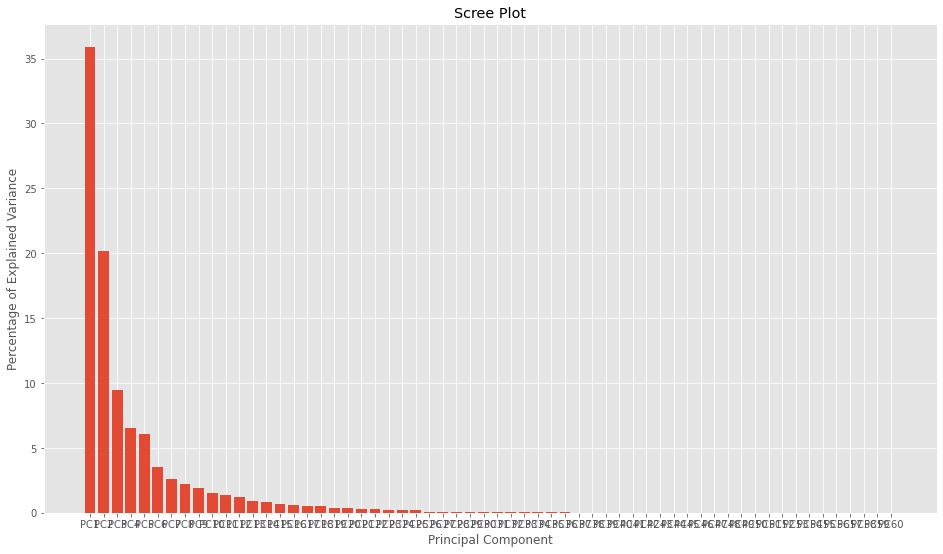

In [185]:
plt.bar(x=range(1, len(per_var_alldataset) + 1 ), height = per_var_alldataset, tick_label = labels_alldataset)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [186]:
#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_alldataset_alldataset = pd.DataFrame(pca_data_alldataset, index = alldataset_dataset_15_10inst.columns , columns = labels_alldataset)

In [187]:
# Loading scores for PC1

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[0], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values
PC1_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]
PC1_df_alldataset = PC1_loading_scores_alldataset.to_frame()
PC1_df_alldataset = PC1_df_alldataset.rename(columns={0: 'Col_1'})
PC1_df_alldataset.reset_index(level=0, inplace=True)


###################

# Loading scores for PC2

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[1], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values
PC2_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC2_df_alldataset = PC2_loading_scores_alldataset.to_frame()
PC2_df_alldataset = PC2_df_alldataset.rename(columns={0: 'Col_1'})
PC2_df_alldataset.reset_index(level=0, inplace=True)

##########################

# Loading scores for PC3

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[2], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC3_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC3_df_alldataset = PC3_loading_scores_alldataset.to_frame()
PC3_df_alldataset = PC3_df_alldataset.rename(columns={0: 'Col_1'})

PC3_df_alldataset.reset_index(level=0, inplace=True)

##########################

# Loading scores for PC4


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[3], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC4_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC4_df_alldataset = PC4_loading_scores_alldataset.to_frame()
PC4_df_alldataset = PC4_df_alldataset.rename(columns={0: 'Col_1'})
PC4_df_alldataset.reset_index(level=0, inplace=True)

##################

# Loading scores for PC5

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[4], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC5_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC5_df_alldataset = PC5_loading_scores_alldataset.to_frame()
PC5_df_alldataset = PC5_df_alldataset.rename(columns={0: 'Col_1'})
PC5_df_alldataset.reset_index(level=0, inplace=True)

######################

# Loading scores for PC6

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[5], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC6_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC6_df_alldataset = PC6_loading_scores_alldataset.to_frame()
PC6_df_alldataset = PC6_df_alldataset.rename(columns={0: 'Col_1'})
PC6_df_alldataset.reset_index(level=0, inplace=True)

#########################

# Loading scores for PC7

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[6], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC7_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC7_df_alldataset = PC7_loading_scores_alldataset.to_frame()
PC7_df_alldataset = PC7_df_alldataset.rename(columns={0: 'Col_1'})
PC7_df_alldataset.reset_index(level=0, inplace=True)

#################

# Loading scores for PC8

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[7], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC8_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC8_df_alldataset = PC8_loading_scores_alldataset.to_frame()
PC8_df_alldataset = PC8_df_alldataset.rename(columns={0: 'Col_1'})
PC8_df_alldataset.reset_index(level=0, inplace=True)

####################

# Loading scores for PC9

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[8], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC9_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC9_df_alldataset = PC9_loading_scores_alldataset.to_frame()
PC9_df_alldataset = PC9_df_alldataset.rename(columns={0: 'Col_1'})
PC9_df_alldataset.reset_index(level=0, inplace=True)

#####################

# Loading scores for PC10


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[9], index = alldataset_dataset_15_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values
PC10_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC10_df_alldataset = PC10_loading_scores_alldataset.to_frame()
PC10_df_alldataset = PC10_df_alldataset.rename(columns={0: 'Col_1'})
PC10_df_alldataset.reset_index(level=0, inplace=True)


In [188]:
#calcular qué feature se repite más

PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)

dic = {}
for i in range(100):
    x = list(PCA_10components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

{'feature_514': 1,
 'feature_491': 1,
 'feature_537': 1,
 'feature_468': 1,
 'feature_445': 1,
 'feature_609': 1,
 'feature_560': 1,
 'feature_586': 1,
 'feature_422': 1,
 'feature_563': 1,
 'feature_164': 1,
 'feature_141': 1,
 'feature_163': 1,
 'feature_162': 1,
 'feature_140': 1,
 'feature_139': 1,
 'feature_187': 1,
 'feature_118': 1,
 'feature_165': 1,
 'feature_167': 1,
 'feature_227': 1,
 'feature_225': 1,
 'feature_202': 1,
 'feature_204': 1,
 'feature_250': 1,
 'feature_179': 1,
 'feature_229': 1,
 'feature_248': 1,
 'feature_156': 1,
 'feature_181': 1,
 'feature_199': 1,
 'feature_176': 1,
 'feature_153': 1,
 'feature_130': 1,
 'feature_222': 1,
 'feature_245': 1,
 'feature_182': 1,
 'feature_205': 1,
 'feature_201': 1,
 'feature_178': 1,
 'feature_545': 1,
 'feature_522': 1,
 'feature_499': 1,
 'feature_568': 1,
 'feature_476': 1,
 'feature_551': 1,
 'feature_528': 1,
 'feature_524': 1,
 'feature_547': 1,
 'feature_526': 1,
 'feature_23': 1,
 'feature_0': 1,
 'feature_33': 

In [189]:
##############################
  #HOW TO CALCULATE WITH PCA ( 10 components )
#############################
		
projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_15_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60'
    ],
    index   = new_alldataset_dataset_15_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,3.902096,-7.142497,-8.069028,-1.463609,-1.940785,-1.400794,-0.379175,-1.780699,-1.632372,0.920342,...,0.083266,0.148730,0.263925,0.084658,0.213390,-0.009931,-0.039369,0.020268,0.027434,-0.024331
1,6.138840,-6.855299,-7.657035,-1.849533,-2.789458,-0.634698,0.663727,-2.050655,-1.203499,-0.577419,...,0.187613,0.199285,0.294398,0.113478,0.171571,-0.009884,-0.060392,0.124040,0.048170,0.036367
2,3.313068,-7.228730,-7.568322,-1.353645,-1.870517,-1.548299,-0.823017,-1.792696,-1.526513,0.835399,...,0.080185,0.190279,0.190856,0.038951,0.152876,-0.020056,0.014171,-0.001841,-0.001895,-0.043364
3,4.245398,-7.409352,-6.618455,-1.683497,-0.903875,-0.978680,-0.370018,-2.013614,-1.711852,0.224775,...,0.104933,0.135724,0.186693,0.019895,0.156662,0.016029,0.047977,-0.027804,0.039493,-0.017995
4,6.228913,-6.835669,-7.497849,-1.857677,-2.182108,-0.557078,0.461223,-2.151448,-1.093012,-0.446714,...,0.199037,0.258977,0.295964,0.054067,0.200967,0.018415,-0.044084,0.097368,0.053896,0.013850


In [190]:
PC10_15_10inst_alldataset = projection_alldataset.iloc[:,0:10]
PC10_15_10inst_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.902096,-7.142497,-8.069028,-1.463609,-1.940785,-1.400794,-0.379175,-1.780699,-1.632372,0.920342
1,6.138840,-6.855299,-7.657035,-1.849533,-2.789458,-0.634698,0.663727,-2.050655,-1.203499,-0.577419
2,3.313068,-7.228730,-7.568322,-1.353645,-1.870517,-1.548299,-0.823017,-1.792696,-1.526513,0.835399
3,4.245398,-7.409352,-6.618455,-1.683497,-0.903875,-0.978680,-0.370018,-2.013614,-1.711852,0.224775
4,6.228913,-6.835669,-7.497849,-1.857677,-2.182108,-0.557078,0.461223,-2.151448,-1.093012,-0.446714


In [191]:
PC10_15_10inst_alldataset.insert(0,"instance",['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'bien_16', 'bien_241', 'bien_244',
       'bien_278', 'bien_295', 'bien_329', 'bien_39', 'bien_401',
       'bien_561', 'bien_95', 'comer_144', 'comer_248', 'comer_286',
       'comer_303', 'comer_323', 'comer_335', 'comer_560', 'comer_625',
       'comer_712', 'comer_765', 'emoción_143', 'emoción_249',
       'emoción_250', 'emoción_272', 'emoción_281', 'emoción_286',
       'emoción_43', 'emoción_54', 'emoción_71', 'emoción_93',
       'sentir_14', 'sentir_149', 'sentir_16', 'sentir_187', 'sentir_38',
       'sentir_458', 'sentir_591', 'sentir_602', 'sentir_604',
       'sentir_89', 'sí_157', 'sí_159', 'sí_194', 'sí_240', 'sí_253',
       'sí_281', 'sí_633', 'sí_76', 'sí_79', 'sí_83'],True)
	   
	   ##################
	   
PC10_15_10inst_alldataset['classes'] = PC10_15_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])
	   
	   #################
	   
PC10_15_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC10_15_10inst_alldataset.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,3.902096,-7.142497,-8.069028,-1.463609,-1.940785,-1.400794,-0.379175,-1.780699,-1.632372,0.920342,aprender
1,6.138840,-6.855299,-7.657035,-1.849533,-2.789458,-0.634698,0.663727,-2.050655,-1.203499,-0.577419,aprender
2,3.313068,-7.228730,-7.568322,-1.353645,-1.870517,-1.548299,-0.823017,-1.792696,-1.526513,0.835399,aprender
3,4.245398,-7.409352,-6.618455,-1.683497,-0.903875,-0.978680,-0.370018,-2.013614,-1.711852,0.224775,aprender
4,6.228913,-6.835669,-7.497849,-1.857677,-2.182108,-0.557078,0.461223,-2.151448,-1.093012,-0.446714,aprender


In [192]:
print(pd.unique(PC10_15_10inst_alldataset['classes']))

X_PC10_15_10inst_alldataset= PC10_15_10inst_alldataset.iloc[:,:-1].values
y_PC10_15_10inst_alldataset=  PC10_15_10inst_alldataset.iloc[:,-1].values

['aprender' 'bien' 'comer' 'emoción' 'sentir' 'sí']


In [193]:
Labelencoder_Y = LabelEncoder()
y_PC10_15_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC10_15_10inst_alldataset)
y_PC10_15_10inst_alldataset

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender', 'bien',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien',
       'bien', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'comer', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'sentir', 'sentir', 'sentir', 'sentir',
       'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sí',
       'sí', 'sí', 'sí', 'sí', 'sí', 'sí', 'sí', 'sí', 'sí'], dtype=object)

In [194]:
X_train_PC10_15_10inst_alldataset, X_test_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset, y_test_PC10_15_10inst_alldataset = train_test_split(X_PC10_15_10inst_alldataset, y_PC10_15_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_15_10inst_alldataset = scaler.fit_transform(X_train_PC10_15_10inst_alldataset)
X_test_PC10_15_10inst_alldataset = scaler.transform(X_test_PC10_15_10inst_alldataset)

([<matplotlib.axis.XTick at 0x23290d74808>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

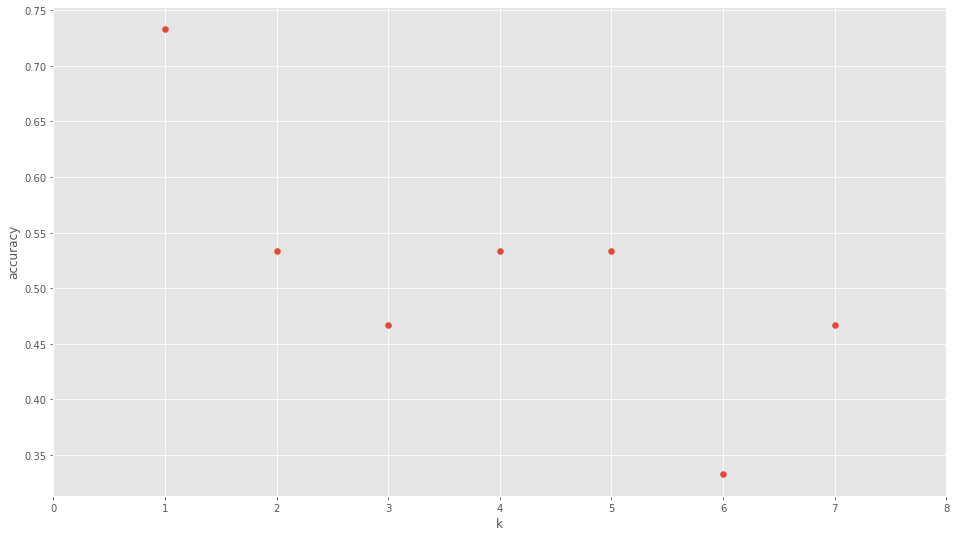

In [195]:
k_range_PC10_15_10inst_alldataset = range(1, 8)
scores_PC10_15_10inst_alldataset = []
for k in k_range_PC10_15_10inst_alldataset:
    knn_PC10_15_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_15_10inst_alldataset.fit(X_train_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset)
    scores_PC10_15_10inst_alldataset.append(knn_PC10_15_10inst_alldataset.score(X_test_PC10_15_10inst_alldataset, y_test_PC10_15_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_15_10inst_alldataset, scores_PC10_15_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k =1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.73


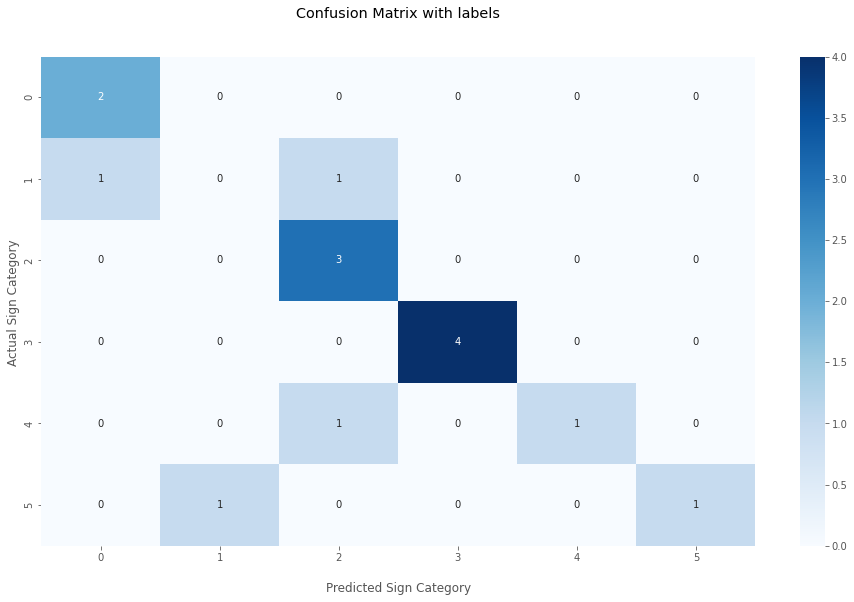

In [196]:
n_neighbors_PC10_15_10inst_alldataset = 1
 
knn_PC10_15_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_15_10inst_alldataset)
knn_PC10_15_10inst_alldataset.fit(X_train_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_15_10inst_alldataset.score(X_train_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_15_10inst_alldataset.score(X_test_PC10_15_10inst_alldataset, y_test_PC10_15_10inst_alldataset)))
	 
import pandas as pd

pred_PC10_15_10inst_alldataset = knn_PC10_15_10inst_alldataset.predict(X_test_PC10_15_10inst_alldataset)
cf_matrix_PC10_15_10inst_alldataset = confusion_matrix(y_test_PC10_15_10inst_alldataset, pred_PC10_15_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_15_10inst_alldataset = sns.heatmap(cf_matrix_PC10_15_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_15_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_15_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_15_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order
#temp1 = ax_PC10_15_10inst_alldataset.xaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp1.array()
#temp2 = ax_PC10_15_10inst_alldataset.yaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp2.shape

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.53


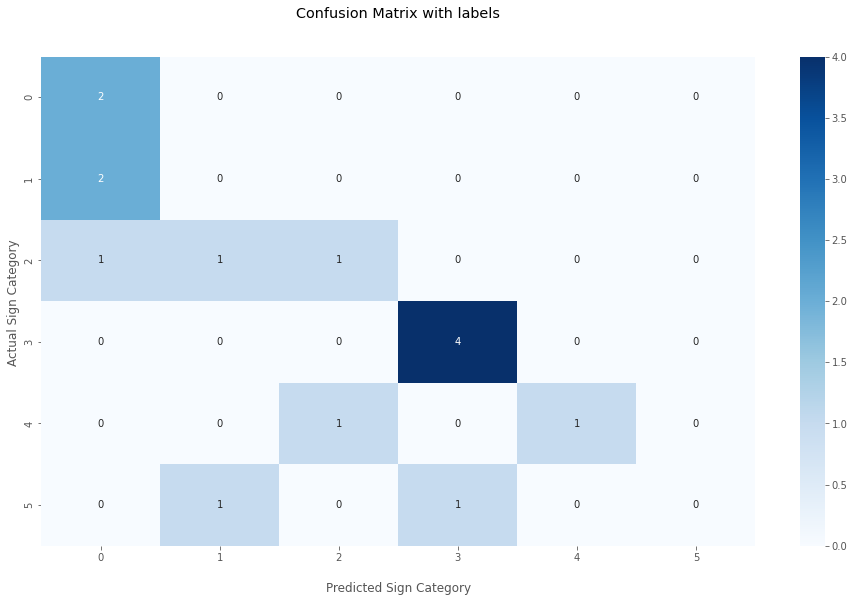

In [197]:
n_neighbors_PC10_15_10inst_alldataset = 2
 
knn_PC10_15_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_15_10inst_alldataset)
knn_PC10_15_10inst_alldataset.fit(X_train_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_15_10inst_alldataset.score(X_train_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_15_10inst_alldataset.score(X_test_PC10_15_10inst_alldataset, y_test_PC10_15_10inst_alldataset)))
	 
import pandas as pd

pred_PC10_15_10inst_alldataset = knn_PC10_15_10inst_alldataset.predict(X_test_PC10_15_10inst_alldataset)
cf_matrix_PC10_15_10inst_alldataset = confusion_matrix(y_test_PC10_15_10inst_alldataset, pred_PC10_15_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_15_10inst_alldataset = sns.heatmap(cf_matrix_PC10_15_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_15_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_15_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_15_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order
#temp1 = ax_PC10_15_10inst_alldataset.xaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp1.array()
#temp2 = ax_PC10_15_10inst_alldataset.yaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp2.shape

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.47


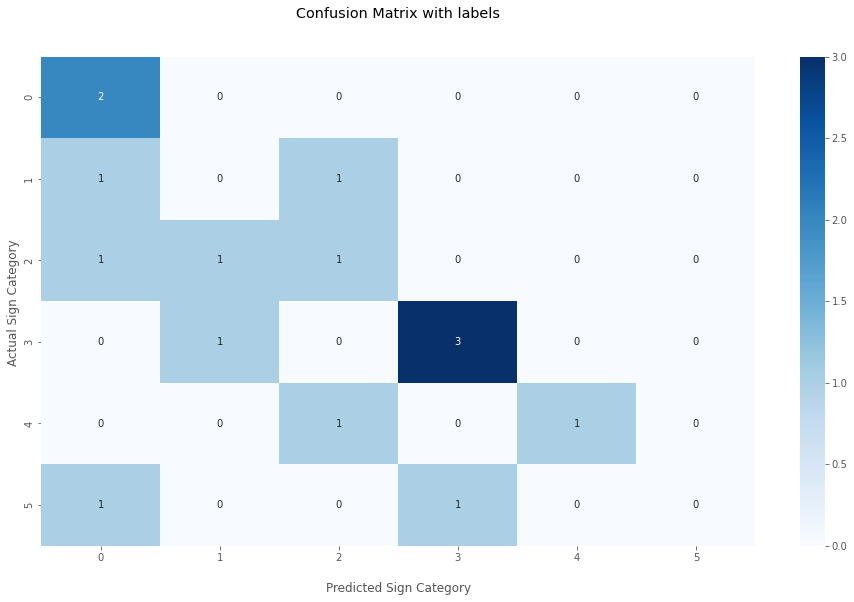

In [198]:
n_neighbors_PC10_15_10inst_alldataset = 3
 
knn_PC10_15_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_15_10inst_alldataset)
knn_PC10_15_10inst_alldataset.fit(X_train_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_15_10inst_alldataset.score(X_train_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_15_10inst_alldataset.score(X_test_PC10_15_10inst_alldataset, y_test_PC10_15_10inst_alldataset)))
	 
import pandas as pd

pred_PC10_15_10inst_alldataset = knn_PC10_15_10inst_alldataset.predict(X_test_PC10_15_10inst_alldataset)
cf_matrix_PC10_15_10inst_alldataset = confusion_matrix(y_test_PC10_15_10inst_alldataset, pred_PC10_15_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_15_10inst_alldataset = sns.heatmap(cf_matrix_PC10_15_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_15_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_15_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_15_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order
#temp1 = ax_PC10_15_10inst_alldataset.xaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp1.array()
#temp2 = ax_PC10_15_10inst_alldataset.yaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp2.shape

## Display the visualization of the Confusion Matrix.
plt.show()

# With k=5

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.53


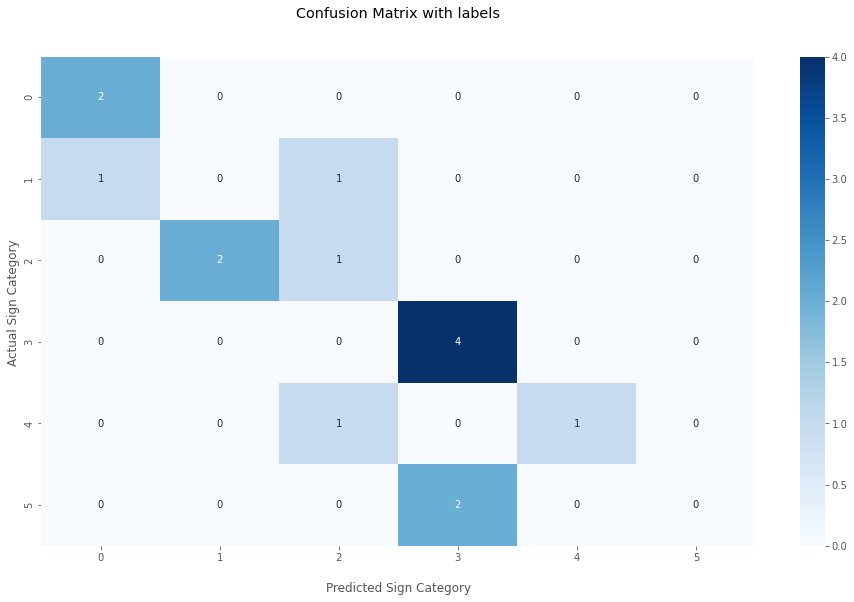

In [199]:
n_neighbors_PC10_15_10inst_alldataset = 5
 
knn_PC10_15_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_15_10inst_alldataset)
knn_PC10_15_10inst_alldataset.fit(X_train_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_15_10inst_alldataset.score(X_train_PC10_15_10inst_alldataset, y_train_PC10_15_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_15_10inst_alldataset.score(X_test_PC10_15_10inst_alldataset, y_test_PC10_15_10inst_alldataset)))
	 
import pandas as pd

pred_PC10_15_10inst_alldataset = knn_PC10_15_10inst_alldataset.predict(X_test_PC10_15_10inst_alldataset)
cf_matrix_PC10_15_10inst_alldataset = confusion_matrix(y_test_PC10_15_10inst_alldataset, pred_PC10_15_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_15_10inst_alldataset = sns.heatmap(cf_matrix_PC10_15_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_15_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_15_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_15_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order
#temp1 = ax_PC10_15_10inst_alldataset.xaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp1.array()
#temp2 = ax_PC10_15_10inst_alldataset.yaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp2.shape

## Display the visualization of the Confusion Matrix.
plt.show()

In [200]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################

projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_15_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC6','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40', 'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60'],
    index   = new_alldataset_dataset_15_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC6,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,3.902096,-7.142497,-8.069028,-1.463609,-1.940785,-1.400794,-0.379175,-1.780699,-1.632372,0.920342,...,0.083266,0.148730,0.263925,0.084658,0.213390,-0.009931,-0.039369,0.020268,0.027434,-0.024331
1,6.138840,-6.855299,-7.657035,-1.849533,-2.789458,-0.634698,0.663727,-2.050655,-1.203499,-0.577419,...,0.187613,0.199285,0.294398,0.113478,0.171571,-0.009884,-0.060392,0.124040,0.048170,0.036367
2,3.313068,-7.228730,-7.568322,-1.353645,-1.870517,-1.548299,-0.823017,-1.792696,-1.526513,0.835399,...,0.080185,0.190279,0.190856,0.038951,0.152876,-0.020056,0.014171,-0.001841,-0.001895,-0.043364
3,4.245398,-7.409352,-6.618455,-1.683497,-0.903875,-0.978680,-0.370018,-2.013614,-1.711852,0.224775,...,0.104933,0.135724,0.186693,0.019895,0.156662,0.016029,0.047977,-0.027804,0.039493,-0.017995
4,6.228913,-6.835669,-7.497849,-1.857677,-2.182108,-0.557078,0.461223,-2.151448,-1.093012,-0.446714,...,0.199037,0.258977,0.295964,0.054067,0.200967,0.018415,-0.044084,0.097368,0.053896,0.013850


In [201]:
PC6_15_10inst_alldataset = projection_alldataset.iloc[:,0:6]
PC6_15_10inst_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.902096,-7.142497,-8.069028,-1.463609,-1.940785,-1.400794
1,6.138840,-6.855299,-7.657035,-1.849533,-2.789458,-0.634698
2,3.313068,-7.228730,-7.568322,-1.353645,-1.870517,-1.548299
3,4.245398,-7.409352,-6.618455,-1.683497,-0.903875,-0.978680
4,6.228913,-6.835669,-7.497849,-1.857677,-2.182108,-0.557078


In [202]:

PC6_15_10inst_alldataset.insert(0,"instance",['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'bien_16', 'bien_241', 'bien_244',
       'bien_278', 'bien_295', 'bien_329', 'bien_39', 'bien_401',
       'bien_561', 'bien_95', 'comer_144', 'comer_248', 'comer_286',
       'comer_303', 'comer_323', 'comer_335', 'comer_560', 'comer_625',
       'comer_712', 'comer_765', 'emoción_143', 'emoción_249',
       'emoción_250', 'emoción_272', 'emoción_281', 'emoción_286',
       'emoción_43', 'emoción_54', 'emoción_71', 'emoción_93',
       'sentir_14', 'sentir_149', 'sentir_16', 'sentir_187', 'sentir_38',
       'sentir_458', 'sentir_591', 'sentir_602', 'sentir_604',
       'sentir_89', 'sí_157', 'sí_159', 'sí_194', 'sí_240', 'sí_253',
       'sí_281', 'sí_633', 'sí_76', 'sí_79', 'sí_83'],True)

In [203]:
PC6_15_10inst_alldataset['classes'] = PC6_15_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [204]:
PC6_15_10inst_alldataset.drop("instance", axis=1, inplace=True)
PC6_15_10inst_alldataset.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,3.902096,-7.142497,-8.069028,-1.463609,-1.940785,-1.400794,aprender
1,6.138840,-6.855299,-7.657035,-1.849533,-2.789458,-0.634698,aprender
2,3.313068,-7.228730,-7.568322,-1.353645,-1.870517,-1.548299,aprender
3,4.245398,-7.409352,-6.618455,-1.683497,-0.903875,-0.978680,aprender
4,6.228913,-6.835669,-7.497849,-1.857677,-2.182108,-0.557078,aprender


In [205]:
print(pd.unique(PC6_15_10inst_alldataset['classes']))

X_PC6_15_10inst_alldataset= PC6_15_10inst_alldataset.iloc[:,:-1].values
y_PC6_15_10inst_alldataset=  PC6_15_10inst_alldataset.iloc[:,-1].values

['aprender' 'bien' 'comer' 'emoción' 'sentir' 'sí']


In [206]:
Labelencoder_Y = LabelEncoder()
y_PC6_15_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC6_15_10inst_alldataset)
y_PC6_15_10inst_alldataset

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender', 'bien',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien',
       'bien', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'comer', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'sentir', 'sentir', 'sentir', 'sentir',
       'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sí',
       'sí', 'sí', 'sí', 'sí', 'sí', 'sí', 'sí', 'sí', 'sí'], dtype=object)

In [207]:
X_train_PC6_15_10inst_alldataset, X_test_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset, y_test_PC6_15_10inst_alldataset = train_test_split(X_PC6_15_10inst_alldataset, y_PC6_15_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_15_10inst_alldataset = scaler.fit_transform(X_train_PC6_15_10inst_alldataset)
X_test_PC6_15_10inst_alldataset = scaler.transform(X_test_PC6_15_10inst_alldataset)

([<matplotlib.axis.XTick at 0x23293102888>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

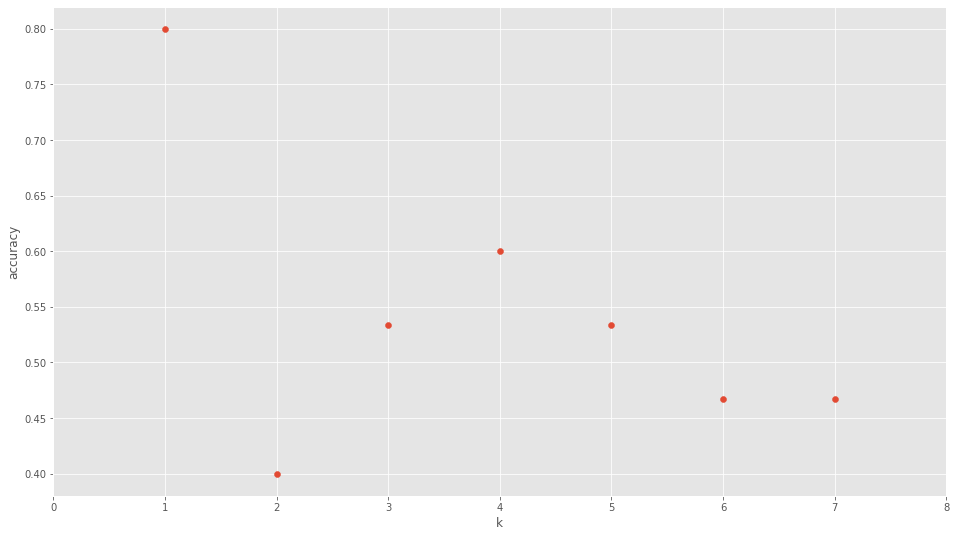

In [208]:
k_range_PC6_15_10inst_alldataset = range(1, 8)
scores_PC6_15_10inst_alldataset = []
for k in k_range_PC6_15_10inst_alldataset:
    knn_PC6_15_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_15_10inst_alldataset.fit(X_train_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset)
    scores_PC6_15_10inst_alldataset.append(knn_PC6_15_10inst_alldataset.score(X_test_PC6_15_10inst_alldataset, y_test_PC6_15_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_15_10inst_alldataset, scores_PC6_15_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.80


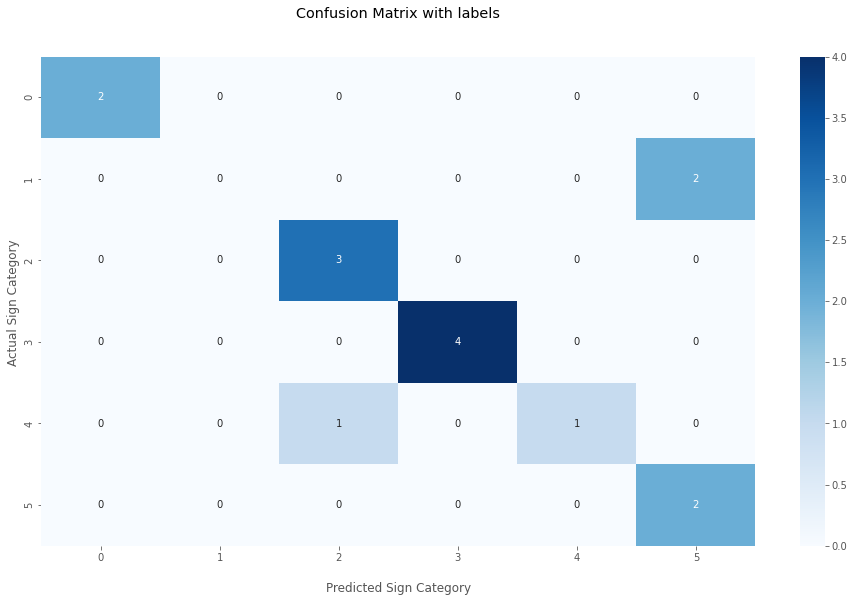

In [209]:
n_neighbors_PC6_15_10inst_alldataset = 1
 
knn_PC6_15_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_15_10inst_alldataset)
knn_PC6_15_10inst_alldataset.fit(X_train_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_15_10inst_alldataset.score(X_train_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_15_10inst_alldataset.score(X_test_PC6_15_10inst_alldataset, y_test_PC6_15_10inst_alldataset)))
	 
import pandas as pd

pred_PC6_15_10inst_alldataset = knn_PC6_15_10inst_alldataset.predict(X_test_PC6_15_10inst_alldataset)
cf_matrix_PC6_15_10inst_alldataset = confusion_matrix(y_test_PC6_15_10inst_alldataset, pred_PC6_15_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_15_10inst_alldataset = sns.heatmap(cf_matrix_PC6_15_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_15_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_15_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_15_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order
#temp1 = ax_PC6_15_10inst_alldataset.xaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp1.array()
#temp2 = ax_PC6_15_10inst_alldataset.yaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])

#temp2.shape

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.40


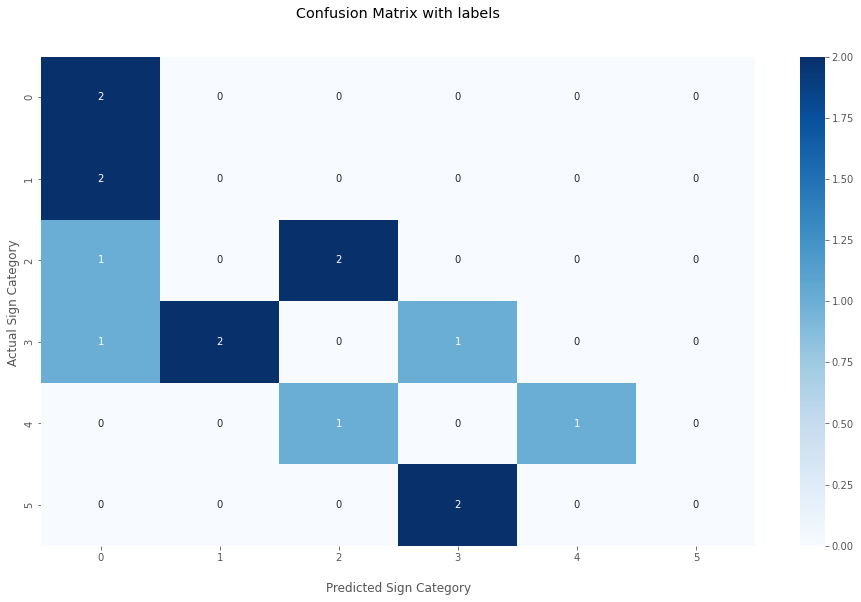

In [210]:
n_neighbors_PC6_15_10inst_alldataset = 2
 
knn_PC6_15_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_15_10inst_alldataset)
knn_PC6_15_10inst_alldataset.fit(X_train_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_15_10inst_alldataset.score(X_train_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_15_10inst_alldataset.score(X_test_PC6_15_10inst_alldataset, y_test_PC6_15_10inst_alldataset)))
	 
import pandas as pd

pred_PC6_15_10inst_alldataset = knn_PC6_15_10inst_alldataset.predict(X_test_PC6_15_10inst_alldataset)
cf_matrix_PC6_15_10inst_alldataset = confusion_matrix(y_test_PC6_15_10inst_alldataset, pred_PC6_15_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_15_10inst_alldataset = sns.heatmap(cf_matrix_PC6_15_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_15_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_15_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_15_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order
#temp1 = ax_PC6_15_10inst_alldataset.xaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp1.array()
#temp2 = ax_PC6_15_10inst_alldataset.yaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])

#temp2.shape

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.60
Accuracy of K-NN classifier on test set: 0.53


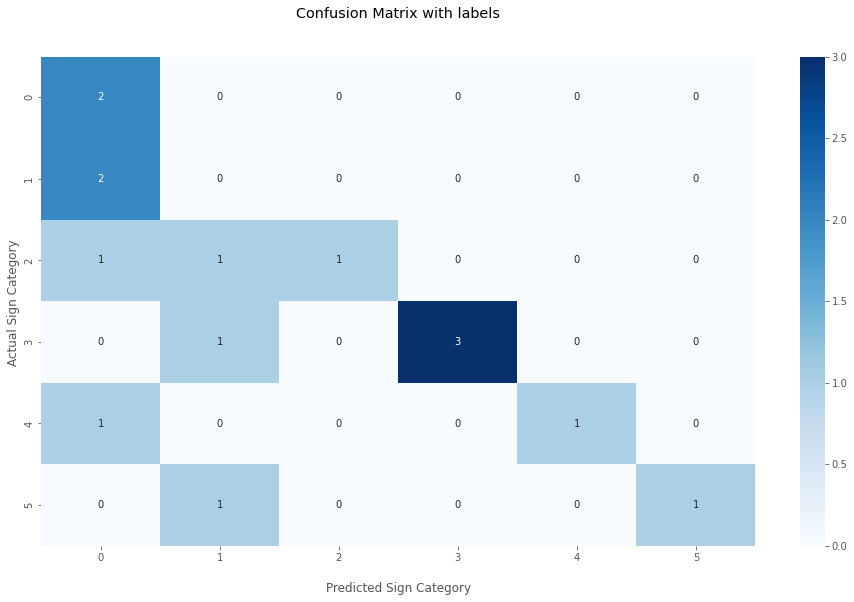

In [211]:
n_neighbors_PC6_15_10inst_alldataset = 3
 
knn_PC6_15_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_15_10inst_alldataset)
knn_PC6_15_10inst_alldataset.fit(X_train_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_15_10inst_alldataset.score(X_train_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_15_10inst_alldataset.score(X_test_PC6_15_10inst_alldataset, y_test_PC6_15_10inst_alldataset)))
	 
import pandas as pd

pred_PC6_15_10inst_alldataset = knn_PC6_15_10inst_alldataset.predict(X_test_PC6_15_10inst_alldataset)
cf_matrix_PC6_15_10inst_alldataset = confusion_matrix(y_test_PC6_15_10inst_alldataset, pred_PC6_15_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_15_10inst_alldataset = sns.heatmap(cf_matrix_PC6_15_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_15_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_15_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_15_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order
#temp1 = ax_PC6_15_10inst_alldataset.xaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp1.array()
#temp2 = ax_PC6_15_10inst_alldataset.yaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])

#temp2.shape

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.58
Accuracy of K-NN classifier on test set: 0.53


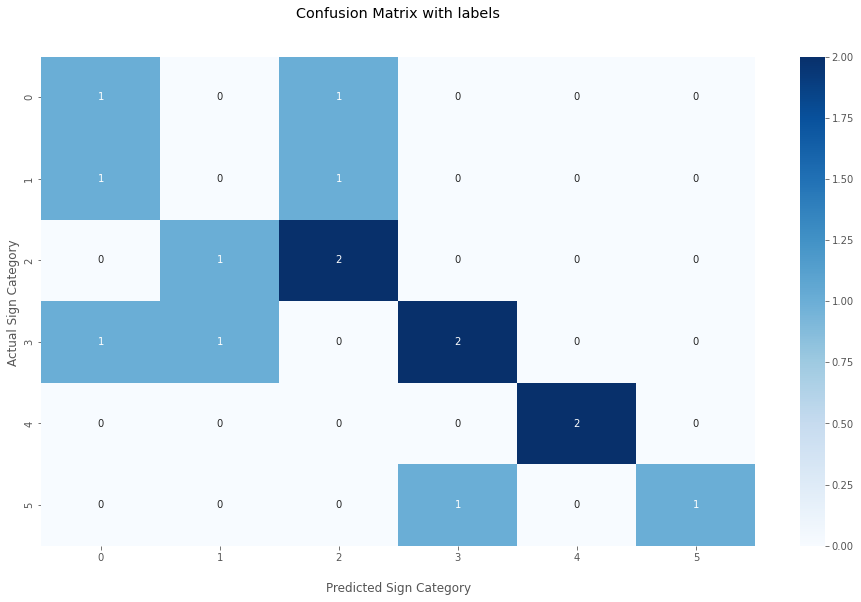

In [212]:
n_neighbors_PC6_15_10inst_alldataset = 5
 
knn_PC6_15_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_15_10inst_alldataset)
knn_PC6_15_10inst_alldataset.fit(X_train_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_15_10inst_alldataset.score(X_train_PC6_15_10inst_alldataset, y_train_PC6_15_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_15_10inst_alldataset.score(X_test_PC6_15_10inst_alldataset, y_test_PC6_15_10inst_alldataset)))
	 
import pandas as pd

pred_PC6_15_10inst_alldataset = knn_PC6_15_10inst_alldataset.predict(X_test_PC6_15_10inst_alldataset)
cf_matrix_PC6_15_10inst_alldataset = confusion_matrix(y_test_PC6_15_10inst_alldataset, pred_PC6_15_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_15_10inst_alldataset = sns.heatmap(cf_matrix_PC6_15_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_15_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_15_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_15_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order
#temp1 = ax_PC6_15_10inst_alldataset.xaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])
#temp1.array()
#temp2 = ax_PC6_15_10inst_alldataset.yaxis.set_ticklabels(['aprender', 'comer', 'pensar', 'sentir'])

#temp2.shape

## Display the visualization of the Confusion Matrix.
plt.show()

In [213]:
PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)

dic = {}
for i in range(60):
    x = list(PCA_6components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
		
dic

{'feature_514': 1,
 'feature_491': 1,
 'feature_537': 1,
 'feature_468': 1,
 'feature_445': 1,
 'feature_609': 1,
 'feature_560': 1,
 'feature_586': 1,
 'feature_422': 1,
 'feature_563': 1,
 'feature_164': 1,
 'feature_141': 1,
 'feature_163': 1,
 'feature_162': 1,
 'feature_140': 1,
 'feature_139': 1,
 'feature_187': 1,
 'feature_118': 1,
 'feature_165': 1,
 'feature_167': 1,
 'feature_227': 1,
 'feature_225': 1,
 'feature_202': 1,
 'feature_204': 1,
 'feature_250': 1,
 'feature_179': 1,
 'feature_229': 1,
 'feature_248': 1,
 'feature_156': 1,
 'feature_181': 1,
 'feature_199': 1,
 'feature_176': 1,
 'feature_153': 1,
 'feature_130': 1,
 'feature_222': 1,
 'feature_245': 1,
 'feature_182': 1,
 'feature_205': 1,
 'feature_201': 1,
 'feature_178': 1,
 'feature_545': 1,
 'feature_522': 1,
 'feature_499': 1,
 'feature_568': 1,
 'feature_476': 1,
 'feature_551': 1,
 'feature_528': 1,
 'feature_524': 1,
 'feature_547': 1,
 'feature_526': 1,
 'feature_23': 1,
 'feature_0': 1,
 'feature_33': 